In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [2]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

plt.rcParams['font.family'] = 'Malgun Gothic'

저희 데이터의 매출 값은 "추정매출"로 "매출/점포수"로 계산한 값입니다.
하나의 지역 내에서도 맛집 등 매출이 많은 점포가 있고, 적은 점포가 존재합니다.
매출이 비정상적으로 급증한 경우 : 매출이 적은 점포가 많이 폐업하여 분모가 감소하였으나, 분자는 변화가 미미한 경우.
매출이 비정상적으로 급감한 경우, 매출이 크게 높은 점포가 몇개가 폐업하여 분모는 미미하게 감소하였으나, 분자가 크게 변화한경우.
와 같은 현상이 수치에 반영된 것이라 보여집니다. 해석에 참고 부탁드립니다.


In [3]:
sales = pd.read_csv('./data/상권_추정매출.csv')
people = pd.read_csv('./data/상권_추정유동인구.csv', encoding='cp949')
company = pd.read_csv('./data/상권_직장인구.csv', encoding='cp949')
apart = pd.read_csv('./data/상권_아파트.csv', encoding='cp949')
store = pd.read_csv('./data/상권_점포.csv', encoding='cp949')

In [4]:
# 각각의 데이터들의 크기를 파악
print(f'매출 : {sales.shape}')
print(f'추정유동인구 : {people.shape}')
print(f'직장인구 : {company.shape}')
print(f'아파트 : {apart.shape}')
print(f'점포 : {store.shape}')

매출 : (132321, 80)
추정유동인구 : (41778, 532)
직장인구 : (37332, 27)
아파트 : (35954, 21)
점포 : (369578, 15)


In [5]:
sales.head()

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액,분기당_매출_건수,...,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포수
0,2020,4,U,관광특구,1001496,강남 마이스 관광특구,CS300043,전자상거래업,3.808746e+06,170,...,0,39,131,0,5,116,49,0,0,8
1,2020,4,U,관광특구,1001496,강남 마이스 관광특구,CS300032,가전제품,2.123969e+09,8062,...,210,3726,3652,84,2400,2154,1469,850,418,8
2,2020,4,U,관광특구,1001496,강남 마이스 관광특구,CS300031,가구,1.192001e+10,6667,...,0,2753,3914,0,306,634,1455,1520,2752,6
3,2020,4,U,관광특구,1001496,강남 마이스 관광특구,CS300028,화초,4.096106e+08,9795,...,12,5050,4262,30,2543,3556,1490,930,763,6
4,2020,4,U,관광특구,1001496,강남 마이스 관광특구,CS300027,섬유제품,9.713897e+08,31185,...,856,5768,25417,1111,15614,6853,3873,3166,568,6


In [6]:
people.head()

,기준 년코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,총_유동인구_수,남성_유동인구_수,여성_유동인구_수,연령대_10_유동인구_수,...,여성연령대_60_이상_토요일시간대_3_유동인구_수,여성연령대_60_이상_토요일시간대_4_유동인구_수,여성연령대_60_이상_토요일시간대_5_유동인구_수,여성연령대_60_이상_토요일시간대_6_유동인구_수,여성연령대_60_이상_일요일시간대_1_유동인구_수,여성연령대_60_이상_일요일시간대_2_유동인구_수,여성연령대_60_이상_일요일시간대_3_유동인구_수,여성연령대_60_이상_일요일시간대_4_유동인구_수,여성연령대_60_이상_일요일시간대_5_유동인구_수,여성연령대_60_이상_일요일시간대_6_유동인구_수
0,2020,4,U,관광특구,1001496,강남 마이스 관광특구,90836,46313,44523,4351,...,142,140,123,39,48,99,124,123,104,35
1,2020,4,U,관광특구,1001495,잠실 관광특구,2956754,1445027,1511727,248574,...,5398,5785,7033,3989,7009,6350,5041,5460,6552,3868
2,2020,4,U,관광특구,1001494,종로?청계 관광특구,3738997,2060445,1678551,96484,...,10547,10296,7883,3577,5160,6020,6495,6618,6352,3992
3,2020,4,U,관광특구,1001493,동대문패션타운 관광특구,3058361,1494579,1563782,99823,...,5674,5149,4481,2629,4734,4903,4273,4182,5044,4354
4,2020,4,U,관광특구,1001492,명동 남대문 북창동 다동 무교동 관광특구,3569497,1853999,1715498,81863,...,9552,8998,4532,1217,1672,3462,4677,4407,3001,1164


In [7]:
# 전체적인 전처리를 위한 함수 
# (2020년만 추출하는 건 작동을 안함..)

f = [sales, people, company, apart, store]
for data in f:
    data.columns = data.columns.str.replace('_','')

In [8]:
# 외식업 데이터만 가져올 것이므로 외식업 자료만 추출
# sales와 store에서만 '서비스업종코드명'이 있어서 두 자료에서만 추출이 가능함
sales = sales[sales['서비스업종코드명'].isin(['분식전문점', '패스트푸드점', '양식음식점','일식음식점','중식음식점','한식음식점','호프-간이주점','치킨전문점'])]
store = store[store['서비스업종코드명'].isin(['분식전문점', '패스트푸드점', '양식음식점','일식음식점','중식음식점','한식음식점','호프-간이주점','치킨전문점'])]

In [9]:
# company의 컬럼명도 일관성있도록 바꿔줌
company.rename(columns = {"기준년월코드": "기준년코드"}, inplace = True)
company.columns

Index(['기준년코드', '기준분기코드', '상권구분코드', '상권구분코드명', '상권코드', '상권코드명', '총직장인구수',
       '남성직장인구수', '여성직장인구수', '연령대10직장인구수', '연령대20직장인구수', '연령대30직장인구수',
       '연령대40직장인구수', '연령대50직장인구수', '연령대60이상직장인구수', '남성연령대10직장인구수',
       '남성연령대20직장인구수', '남성연령대30직장인구수', '남성연령대40직장인구수', '남성연령대50직장인구수',
       '남성연령대60이상직장인구수', '여성연령대10직장인구수', '여성연령대20직장인구수', '여성연령대30직장인구수',
       '여성연령대40직장인구수', '여성연령대50직장인구수', '여성연령대60이상직장인구수'],
      dtype='object')

In [10]:
# 매출과 점포를 합친 데이터셋을 만들었다.
df = pd.merge(sales, store, on=['기준년코드','기준분기코드', '상권구분코드', '상권구분코드명', '상권코드', '상권코드명','서비스업종코드', '서비스업종코드명','점포수'])

In [11]:
# 이제 나머지 3개의 데이터를 먼저 합쳐준다
df1=pd.merge(company, apart, on=['기준년코드','기준분기코드', '상권구분코드', '상권구분코드명','상권코드','상권코드명',])
df1.shape

(34122, 42)

In [12]:
# 유동인구 컬럼명 확인하기
people.columns

Index(['기준 년코드', '기준분기코드', '상권구분코드', ' 상권구분코드명', '상권코드', '상권코드명', '총유동인구수',
       '남성유동인구수', '여성유동인구수', '연령대10유동인구수',
       ...
       '여성연령대60이상토요일시간대3유동인구수', '여성연령대60이상토요일시간대4유동인구수',
       '여성연령대60이상토요일시간대5유동인구수', '여성연령대60이상토요일시간대6유동인구수',
       '여성연령대60이상일요일시간대1유동인구수', '여성연령대60이상일요일시간대2유동인구수',
       '여성연령대60이상일요일시간대3유동인구수', '여성연령대60이상일요일시간대4유동인구수',
       '여성연령대60이상일요일시간대5유동인구수', '여성연령대60이상일요일시간대6유동인구수'],
      dtype='object', length=532)

In [13]:
people.columns=people.columns.str.replace(' ','')

In [14]:
df2=pd.merge(df1, people, on=['기준년코드', '기준분기코드', '상권구분코드', '상권구분코드명', '상권코드', '상권코드명'])

In [15]:
# 유동인구, 직장인구, 아파트를 합친 자료
df2

,기준년코드,기준분기코드,상권구분코드,상권구분코드명,상권코드,상권코드명,총직장인구수,남성직장인구수,여성직장인구수,연령대10직장인구수,...,여성연령대60이상토요일시간대3유동인구수,여성연령대60이상토요일시간대4유동인구수,여성연령대60이상토요일시간대5유동인구수,여성연령대60이상토요일시간대6유동인구수,여성연령대60이상일요일시간대1유동인구수,여성연령대60이상일요일시간대2유동인구수,여성연령대60이상일요일시간대3유동인구수,여성연령대60이상일요일시간대4유동인구수,여성연령대60이상일요일시간대5유동인구수,여성연령대60이상일요일시간대6유동인구수
0,2020,4,U,관광특구,1001495,잠실 관광특구,24375,14199,10176,120,...,5398,5785,7033,3989,7009,6350,5041,5460,6552,3868
1,2020,4,U,관광특구,1001494,종로?청계 관광특구,32935,17150,15785,68,...,10547,10296,7883,3577,5160,6020,6495,6618,6352,3992
2,2020,4,U,관광특구,1001493,동대문패션타운 관광특구,6054,2958,3096,36,...,5674,5149,4481,2629,4734,4903,4273,4182,5044,4354
3,2020,4,U,관광특구,1001491,이태원 관광특구,5839,3064,2775,28,...,2646,2801,3716,2462,4708,3848,2565,2598,3332,2318
4,2020,4,R,전통시장,1001490,길동복조리시장,430,242,188,4,...,2478,2523,3412,2641,5460,4288,2493,2562,3545,2713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34116,2014,2,A,골목상권,1000006,북촌로11길,17,7,10,0,...,66,44,24,0,0,0,23,27,9,0
34117,2014,2,A,골목상권,1000005,백석동길,91,51,40,0,...,42,28,18,1,0,3,7,17,7,1
34118,2014,2,A,골목상권,1000004,명륜길,7,5,2,0,...,14,6,6,0,0,1,3,4,4,0
34119,2014,2,A,골목상권,1000003,돈화문로11가길,1028,564,464,1,...,143,144,114,15,0,21,60,69,54,7


In [16]:
# df2에서 연도 자료 2020년만 추출
df2 = df2[df2.iloc[:,0]==2020]
df2

,기준년코드,기준분기코드,상권구분코드,상권구분코드명,상권코드,상권코드명,총직장인구수,남성직장인구수,여성직장인구수,연령대10직장인구수,...,여성연령대60이상토요일시간대3유동인구수,여성연령대60이상토요일시간대4유동인구수,여성연령대60이상토요일시간대5유동인구수,여성연령대60이상토요일시간대6유동인구수,여성연령대60이상일요일시간대1유동인구수,여성연령대60이상일요일시간대2유동인구수,여성연령대60이상일요일시간대3유동인구수,여성연령대60이상일요일시간대4유동인구수,여성연령대60이상일요일시간대5유동인구수,여성연령대60이상일요일시간대6유동인구수
0,2020,4,U,관광특구,1001495,잠실 관광특구,24375,14199,10176,120,...,5398,5785,7033,3989,7009,6350,5041,5460,6552,3868
1,2020,4,U,관광특구,1001494,종로?청계 관광특구,32935,17150,15785,68,...,10547,10296,7883,3577,5160,6020,6495,6618,6352,3992
2,2020,4,U,관광특구,1001493,동대문패션타운 관광특구,6054,2958,3096,36,...,5674,5149,4481,2629,4734,4903,4273,4182,5044,4354
3,2020,4,U,관광특구,1001491,이태원 관광특구,5839,3064,2775,28,...,2646,2801,3716,2462,4708,3848,2565,2598,3332,2318
4,2020,4,R,전통시장,1001490,길동복조리시장,430,242,188,4,...,2478,2523,3412,2641,5460,4288,2493,2562,3545,2713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5327,2020,1,A,골목상권,1000005,백석동길,1797,1066,731,0,...,528,489,624,551,1223,959,534,502,710,606
5328,2020,1,A,골목상권,1000004,명륜길,56,32,24,0,...,1289,1294,1837,1663,3469,2603,1370,1350,1987,1652
5329,2020,1,A,골목상권,1000003,돈화문로11가길,3686,2700,986,5,...,422,445,444,251,477,433,337,337,364,229
5330,2020,1,A,골목상권,1000002,난계로27길,201,114,87,1,...,958,998,861,554,1110,1036,923,1008,779,512


In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5332 entries, 0 to 5331
Columns: 568 entries, 기준년코드 to 여성연령대60이상일요일시간대6유동인구수
dtypes: float64(12), int64(553), object(3)
memory usage: 23.1+ MB


In [18]:
set(df['상권코드명'].unique())- set(df2['상권코드명'].unique())

{'가락시장',
 '가리봉시장',
 '가산디지털단지역_1',
 '강남개포시장',
 '강남시장_동작',
 '건대입구역',
 '경동시장',
 '경인로77길',
 '경인로90길',
 '고분다리골목시장',
 '고속터미널역',
 '공덕시장',
 '광장시장',
 '교대역_3',
 '국회의사당역_1',
 '길음로7길',
 '길음시장',
 '남대문시장',
 '논현로28길',
 '능동로골목시장',
 '답십리현대시장',
 '대명시장',
 '대원종합시장',
 '도림로147길',
 '도림시장',
 '도봉로8길',
 '도신로60길',
 '독산동 우시장',
 '돈암제일시장',
 '동대문시장_2',
 '동묘앞역',
 '동부시장',
 '동북시장',
 '동소문로6길',
 '동진시장',
 '등나무근린공원 주변',
 '등마루시장',
 '마포농수산물시장',
 '마포시장',
 '만리시장',
 '명동길',
 '미아사거리_2',
 '봉일시장',
 '북창동',
 '사당시장',
 '삼성동시장',
 '삼성역_2',
 '삼성역_3',
 '삼일대로4길',
 '서교시장',
 '서달로14길',
 '서대문구 서대문역_1',
 '서울 강남구 대치역_1',
 '서울 강남구 수서역',
 '서울 강남구 학동역_3',
 '서울 강동구 천호역',
 '서울 노원구 노원역_1',
 '서울 노원구 노원역_2',
 '서울 동작구 노량진1동_1',
 '서울 마포구 공덕역_2',
 '서울 마포구 홍대입구역_3',
 '서울 서초구 서초역',
 '서울 종로구 광화문역_1',
 '서울 종로구 동대문역_1',
 '서울 종로구 동대문역_2',
 '서울 종로구 안국역_1',
 '서울 종로구 종로3가역_1',
 '서울 종로구 종로3가역_2',
 '서울 종로구 종로3가역_3',
 '서울 종로구 종로5가역_1',
 '서울 종로구 종로5가역_3',
 '서울 중구 약수역_1',
 '서울 중구 약수역_2',
 '서울 중구 을지로3가역_1',
 '서울시청',
 '성수이로18길',
 '솔샘시장',
 '수일시장',
 '신노량진시장',
 '신림종합시장',
 '신월

In [19]:
# 각각의 데이터들의 크기를 파악
print(f'매출 : {sales.shape}')
print(f'점포 : {store.shape}')

print(f' df : {df.shape}')

print('-' * 30)

print(f'추정유동인구 : {people.shape}')
print(f'직장인구 : {company.shape}')
print(f'아파트 : {apart.shape}')

print(f' df2 : {df2.shape}')

매출 : (28225, 80)
점포 : (44476, 15)
 df : (11946, 86)
------------------------------
추정유동인구 : (41778, 532)
직장인구 : (37332, 27)
아파트 : (35954, 21)
 df2 : (5332, 568)


In [20]:
# 두 자료를 합친다
food = pd.merge(df, df2, on=['기준년코드', '기준분기코드', '상권구분코드', '상권구분코드명', '상권코드', '상권코드명'])

In [21]:
food.shape

(10920, 648)

In [22]:
food['상권구분코드명'].unique()

array(['관광특구', '전통시장', '발달상권', '골목상권'], dtype=object)

In [23]:
len(food['상권코드명'].unique())

1241

In [24]:
# 매출비율 제거
food = food.drop(food.filter(regex='매출비율'), axis=1)

In [25]:
for i in food.columns:
    print(i)

기준년코드
기준분기코드
상권구분코드
상권구분코드명
상권코드
상권코드명
서비스업종코드
서비스업종코드명
분기당매출금액
분기당매출건수
주중매출금액
주말매출금액
월요일매출금액
화요일매출금액
수요일매출금액
목요일매출금액
금요일매출금액
토요일매출금액
일요일매출금액
시간대00~06매출금액
시간대06~11매출금액
시간대11~14매출금액
시간대14~17매출금액
시간대17~21매출금액
시간대21~24매출금액
남성매출금액
여성매출금액
연령대10매출금액
연령대20매출금액
연령대30매출금액
연령대40매출금액
연령대50매출금액
연령대60이상매출금액
주중매출건수
주말매출건수
월요일매출건수
화요일매출건수
수요일매출건수
목요일매출건수
금요일매출건수
토요일매출건수
일요일매출건수
시간대건수~06매출건수
시간대건수~11매출건수
시간대건수~14매출건수
시간대건수~17매출건수
시간대건수~21매출건수
시간대건수~24매출건수
남성매출건수
여성매출건수
연령대10매출건수
연령대20매출건수
연령대30매출건수
연령대40매출건수
연령대50매출건수
연령대60이상매출건수
점포수
유사업종점포수
개업율
개업점포수
폐업률
폐업점포수
프랜차이즈점포수
총직장인구수
남성직장인구수
여성직장인구수
연령대10직장인구수
연령대20직장인구수
연령대30직장인구수
연령대40직장인구수
연령대50직장인구수
연령대60이상직장인구수
남성연령대10직장인구수
남성연령대20직장인구수
남성연령대30직장인구수
남성연령대40직장인구수
남성연령대50직장인구수
남성연령대60이상직장인구수
여성연령대10직장인구수
여성연령대20직장인구수
여성연령대30직장인구수
여성연령대40직장인구수
여성연령대50직장인구수
여성연령대60이상직장인구수
아파트단지수
아파트면적66제곱미터미만세대수
아파트면적66제곱미터세대수
아파트면적99제곱미터세대수
아파트면적132제곱미터세대수
아파트면적165제곱미터세대수
아파트가격1억미만세대수
아파트가격1억세대수
아파트가격2억세대수
아파트가격3억세대수
아파트가격4억세대수
아파트가격5억세대수
아파트가격6억이상세대수
아파트평균면적
아파트평균시가
총유동인구

In [26]:
for i in food.columns:
    print(i, food[i].isnull().sum())

기준년코드 0
기준분기코드 0
상권구분코드 0
상권구분코드명 0
상권코드 0
상권코드명 0
서비스업종코드 0
서비스업종코드명 0
분기당매출금액 0
분기당매출건수 0
주중매출금액 0
주말매출금액 0
월요일매출금액 0
화요일매출금액 0
수요일매출금액 0
목요일매출금액 0
금요일매출금액 0
토요일매출금액 0
일요일매출금액 0
시간대00~06매출금액 0
시간대06~11매출금액 0
시간대11~14매출금액 0
시간대14~17매출금액 0
시간대17~21매출금액 0
시간대21~24매출금액 0
남성매출금액 0
여성매출금액 0
연령대10매출금액 0
연령대20매출금액 0
연령대30매출금액 0
연령대40매출금액 0
연령대50매출금액 0
연령대60이상매출금액 0
주중매출건수 0
주말매출건수 0
월요일매출건수 0
화요일매출건수 0
수요일매출건수 0
목요일매출건수 0
금요일매출건수 0
토요일매출건수 0
일요일매출건수 0
시간대건수~06매출건수 0
시간대건수~11매출건수 0
시간대건수~14매출건수 0
시간대건수~17매출건수 0
시간대건수~21매출건수 0
시간대건수~24매출건수 0
남성매출건수 0
여성매출건수 0
연령대10매출건수 0
연령대20매출건수 0
연령대30매출건수 0
연령대40매출건수 0
연령대50매출건수 0
연령대60이상매출건수 0
점포수 0
유사업종점포수 0
개업율 0
개업점포수 0
폐업률 0
폐업점포수 0
프랜차이즈점포수 0
총직장인구수 0
남성직장인구수 0
여성직장인구수 0
연령대10직장인구수 0
연령대20직장인구수 0
연령대30직장인구수 0
연령대40직장인구수 0
연령대50직장인구수 0
연령대60이상직장인구수 0
남성연령대10직장인구수 0
남성연령대20직장인구수 0
남성연령대30직장인구수 0
남성연령대40직장인구수 0
남성연령대50직장인구수 0
남성연령대60이상직장인구수 0
여성연령대10직장인구수 0
여성연령대20직장인구수 0
여성연령대30직장인구수 0
여성연령대40직장인구수 0
여성연령대50직장인구수 0
여성연령대60이상직장인구수 0
아파트단지수 0
아파트면적66제곱미터

In [27]:
# 어떻게 할지생각
food.filter(regex='세대수').isnull().sum()

아파트면적66제곱미터미만세대수     128
아파트면적66제곱미터세대수       618
아파트면적99제곱미터세대수      3745
아파트면적132제곱미터세대수     7231
아파트면적165제곱미터세대수     8815
아파트가격1억미만세대수        1669
아파트가격1억세대수           423
아파트가격2억세대수          1005
아파트가격3억세대수          3904
아파트가격4억세대수          6549
아파트가격5억세대수          7859
아파트가격6억이상세대수        8392
dtype: int64

In [28]:
food = food.fillna(0)

In [29]:
food['서비스업종코드']=food['서비스업종코드'].str.replace('CS','').astype(int)

In [30]:
food['서비스업종코드']-=100000
food = food.replace({'U': 1, 'R':2, 'D':3, 'A':4})
food.to_csv('./data/food.csv', index=True)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '분식전문점'),
  Text(1, 0, '양식음식점'),
  Text(2, 0, '일식음식점'),
  Text(3, 0, '중식음식점'),
  Text(4, 0, '치킨전문점'),
  Text(5, 0, '패스트푸드점'),
  Text(6, 0, '한식음식점'),
  Text(7, 0, '호프-간이주점')])

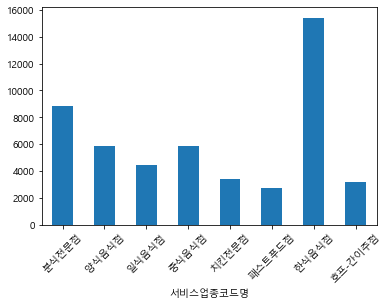

In [31]:
food['분기당매출건수'].groupby(food['서비스업종코드명']).mean().plot(kind='bar')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '분식전문점'),
  Text(1, 0, '양식음식점'),
  Text(2, 0, '일식음식점'),
  Text(3, 0, '중식음식점'),
  Text(4, 0, '치킨전문점'),
  Text(5, 0, '패스트푸드점'),
  Text(6, 0, '한식음식점'),
  Text(7, 0, '호프-간이주점')])

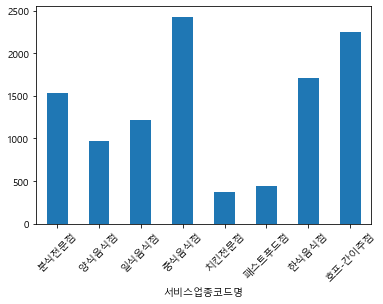

In [32]:
food['분기당매출건수'].groupby(food['서비스업종코드명']).size().plot(kind='bar')
plt.xticks(rotation=45)

(array([0, 1, 2, 3]),
 [Text(0, 0, '골목상권'),
  Text(1, 0, '관광특구'),
  Text(2, 0, '발달상권'),
  Text(3, 0, '전통시장')])

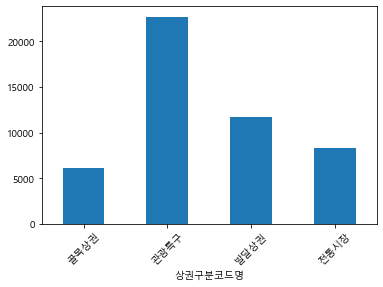

In [33]:
food['분기당매출건수'].groupby(food['상권구분코드명']).mean().plot(kind='bar')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '분식전문점'),
  Text(1, 0, '양식음식점'),
  Text(2, 0, '일식음식점'),
  Text(3, 0, '중식음식점'),
  Text(4, 0, '치킨전문점'),
  Text(5, 0, '패스트푸드점'),
  Text(6, 0, '한식음식점'),
  Text(7, 0, '호프-간이주점')])

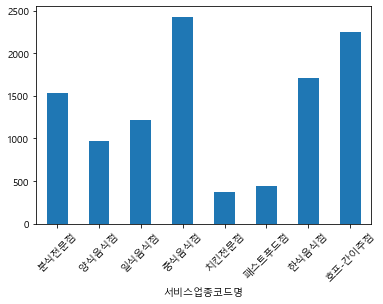

In [34]:
food['분기당매출건수'].groupby(food['서비스업종코드명']).size().plot(kind='bar')
plt.xticks(rotation=45)

In [35]:
food['상권구분코드'].unique()

array([1, 2, 3, 4], dtype=int64)